Import package

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Load Data





In [ ]:
!wget https://raw.githubusercontent.com/BurungMother/Project_AI/main/project.csv

--2022-01-09 06:02:41--  https://raw.githubusercontent.com/BurungMother/Project_AI/main/project.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170166 (166K) [text/plain]
Saving to: ‘project.csv.5’

project.csv.5       100%[===================>] 166.18K  --.-KB/s    in 0.02s   

2022-01-09 06:02:41 (6.66 MB/s) - ‘project.csv.5’ saved [170166/170166]



In [ ]:
tn = pd.read_csv('project.csv')
print(tn.dtypes)
print(tn.isna().values.any())

ID                 int64
MSZoning          object
Street            object
Alley             object
LotArea          float64
LotShape          object
LandContour       object
Utilities         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
HouseStyle       float64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
ExterQual         object
ExterCond         object
Foundation        object
CentralAir        object
Electrical        object
1stFlrSF         float64
2ndFlrSF         float64
TotFlrSF         float64
LowQualFinSF       int64
GrLivArea        float64
Bath               int64
Bedroom            int64
Kitchen            int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
GarageType        object
GarageFinish      object
GarageCars         int64


In [ ]:
print(tn.info())
print(tn.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             800 non-null    int64  
 1   MSZoning       800 non-null    object 
 2   Street         800 non-null    object 
 3   Alley          608 non-null    object 
 4   LotArea        800 non-null    float64
 5   LotShape       800 non-null    object 
 6   LandContour    800 non-null    object 
 7   Utilities      800 non-null    object 
 8   LandSlope      800 non-null    object 
 9   Neighborhood   800 non-null    object 
 10  Condition1     800 non-null    object 
 11  Condition2     800 non-null    object 
 12  HouseStyle     800 non-null    float64
 13  OverallQual    800 non-null    int64  
 14  OverallCond    800 non-null    int64  
 15  YearBuilt      800 non-null    int64  
 16  YearRemodAdd   800 non-null    int64  
 17  RoofStyle      800 non-null    object 
 18  RoofMatl  

Select particular column and Visualise data

   LotArea  HouseStyle  OverallQual  ...  YrSold  Bedroom  Bath
0    200.0         2.0            9  ...    2021        3     2
1     50.0         1.0            7  ...    2019        2     1
2    250.0         4.0            8  ...    2015        0     4
3    500.0         1.0            2  ...    2020        0     1
4     55.0         1.0            6  ...    2020        1     1

[5 rows x 10 columns]


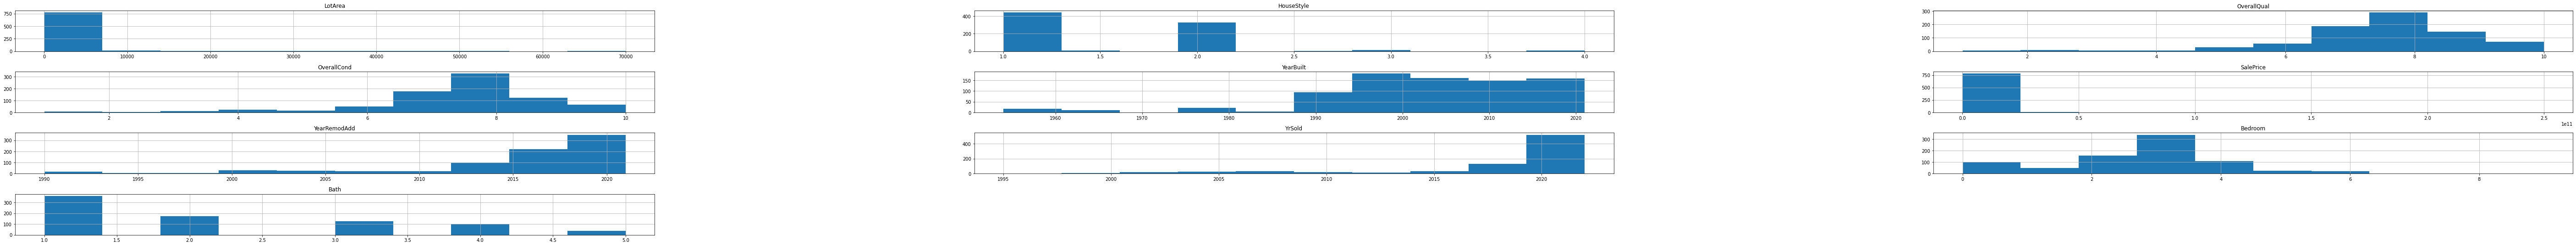

In [ ]:
newtn = tn[['LotArea','HouseStyle','OverallQual','OverallCond','YearBuilt','SalePrice','YearRemodAdd','YrSold','Bedroom','Bath']]
print(newtn.head())
newtn.hist()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Visualise data (Scatter)

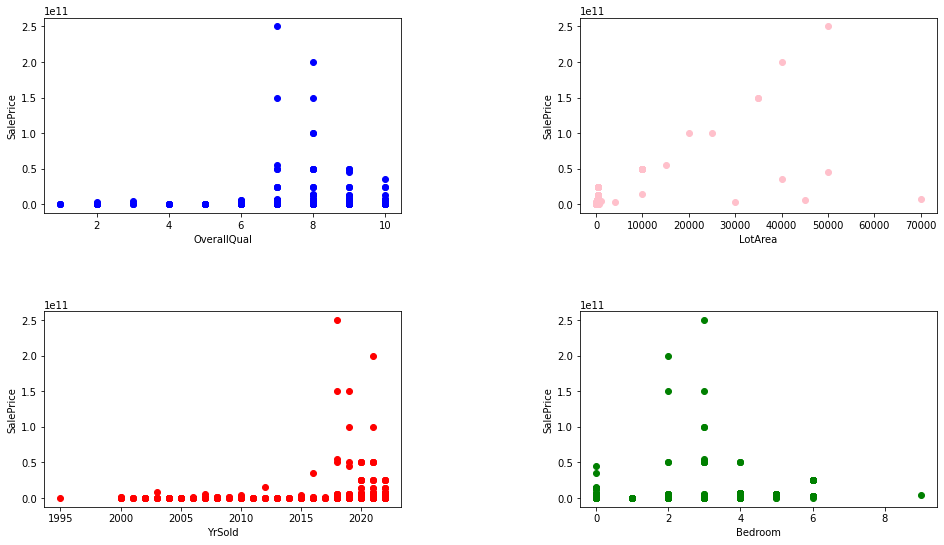

In [ ]:
plt.subplot(221)
plt.scatter(newtn["OverallQual"], newtn["SalePrice"], color="blue")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

plt.subplot(222)
plt.scatter(newtn["LotArea"], newtn["SalePrice"], color="pink")
plt.xlabel("LotArea")
plt.ylabel("SalePrice")

plt.subplot(223)
plt.scatter(newtn["YrSold"], newtn["SalePrice"], color="red")
plt.xlabel("YrSold")
plt.ylabel("SalePrice")

plt.subplot(224)
plt.scatter(newtn["Bedroom"], newtn["SalePrice"], color="green")
plt.xlabel("Bedroom")
plt.ylabel("SalePrice")

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Regression - Survived

In [ ]:
train, test = train_test_split(newtn, test_size=0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["SalePrice"]], train[["LotArea"]])
print('Coefficients: ', regression.coef_)
print('Intercept: ',regression.intercept_)

Coefficients:  [[2.20960751e-07]]
Intercept:  [-25.93881768]


Visualise the regression to the plot

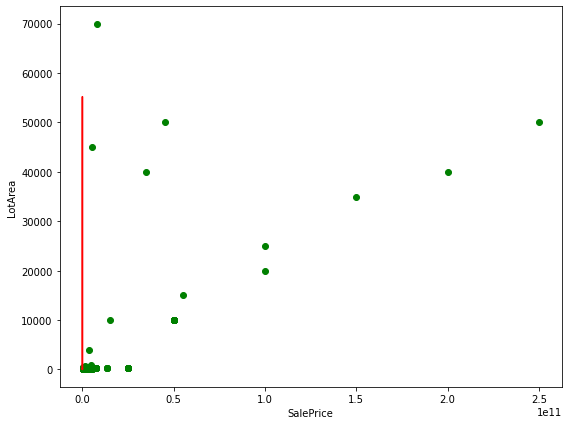

In [ ]:
plt.scatter(train["SalePrice"], train["LotArea"],  color='green')
plt.plot(train[["LotArea"]], regression.coef_ * train[["SalePrice"]] + regression.intercept_, '-r')
plt.ylabel("LotArea")
plt.xlabel("SalePrice")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()

Visualisation (Seaborn)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


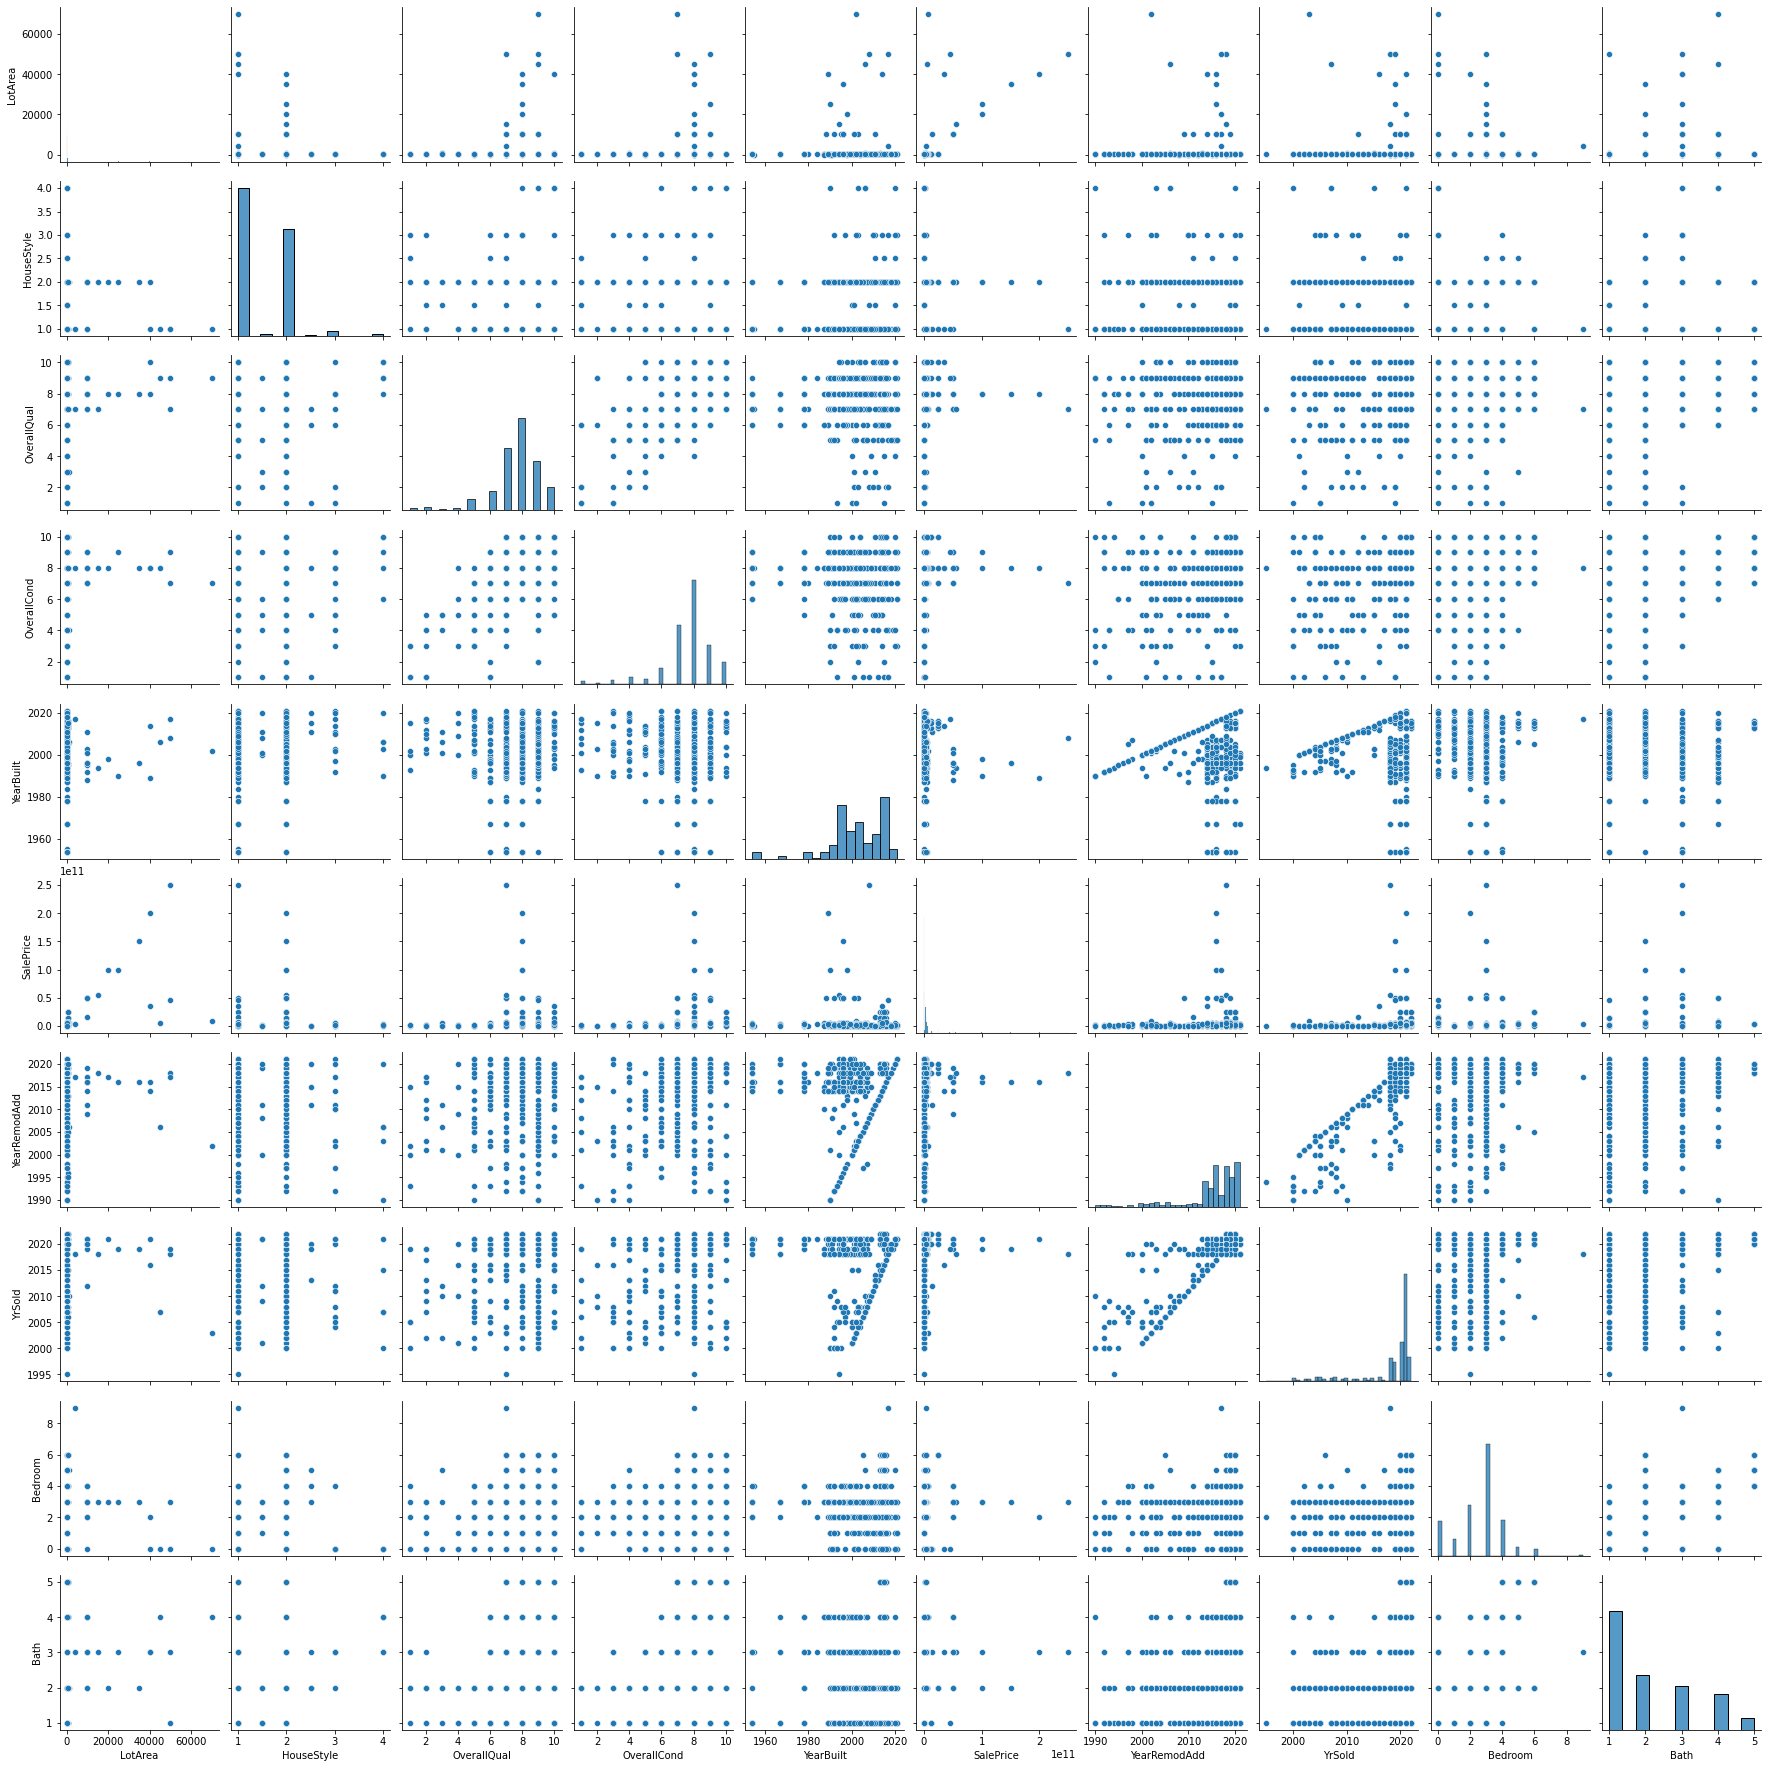

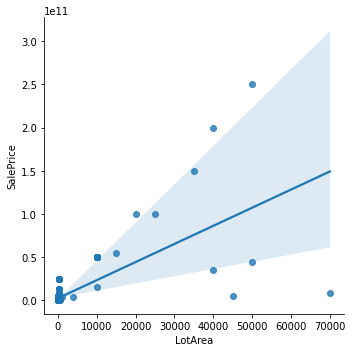

In [ ]:
sb.pairplot(train)
sb.lmplot("LotArea", "SalePrice", data = train)
plt.show()

Predict new data & evaluate model

In [ ]:
prediction = regression.predict(test[["SalePrice"]])
for i in range(len(test)):
  print(test[["SalePrice"]].values[i], prediction[i])

print("MAE : ", mean_absolute_error(test[["LotArea"]], prediction))
print("MSE : ", mean_squared_error(test[["LotArea"]], prediction))
print("R2 : ", r2_score(test[["LotArea"]], prediction))

[7540000000] [1640.10524797]
[750000000] [139.78174588]
[250000000] [29.30137017]
[100000000] [-3.84274254]
[3550000000] [758.47184984]
[4000000000] [857.90418797]
[950000000] [183.97389616]
[1000000000] [195.02193373]
[3500000000] [747.42381227]
[83000000] [-7.59907531]
[2800000000] [592.75128628]
[2800000000] [592.75128628]
[4500000000] [968.38456368]
[750000000] [139.78174588]
[750000000] [139.78174588]
[750000000] [139.78174588]
[850000000] [161.87782102]
[4500000000] [968.38456368]
[450000000] [73.49352046]
[5350000000] [1156.20120238]
[3500000000] [747.42381227]
[80000000] [-8.26195757]
[750000000] [139.78174588]
[2800000000] [592.75128628]
[750000000] [139.78174588]
[83000000] [-7.59907531]
[5350000000] [1156.20120238]
[3200000000] [681.13558684]
[450000000] [73.49352046]
[250000000] [29.30137017]
[500000000] [84.54155803]
[13488000000] [2954.37979738]
[950000000] [183.97389616]
[320000000] [44.76862277]
[150000000] [7.20529503]
[6300000000] [1366.11391622]
[2500000000] [526.463